In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
df_Texas_Covid_case = pd.read_excel("../Texas COVID-19 Fatality Count Data by County.xlsx",header=2)

In [3]:
a = df_Texas_Covid_case.set_index('County Name')

In [4]:
a.T.Bexar

Population          2093502
Fatalities 3/4            0
Fatalities 3/5            0
Fatalities 3/6            0
Fatalities 3/7            0
                     ...   
Fatalities 06/12         82
Fatalities 06/13         84
Fatalities 06/14         88
Fatalities 06/15         88
Fatalities 06/16         89
Name: Bexar, Length: 106, dtype: object

In [5]:
b = a.T.Bexar[1:]

In [6]:
dated_dict = {}
count = 0
for x in b:
    month_temp = int(b.index[count].split(' ')[1].split('/')[0])
    day_temp = int(b.index[count].split(' ')[1].split('/')[1])
    dated_dict[datetime.datetime(2020, month_temp, day_temp)] = b[count]
    count += 1

In [7]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Fatalities'])

In [8]:
c = dated_df.set_index('Date')

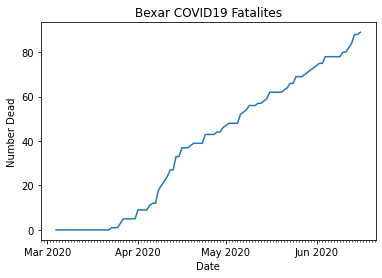

In [9]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Number Dead',color='black')
plt.plot(c)
plt.title('Bexar COVID19 Fatalites')
plt.savefig('BexarFatalites.png')

In [10]:
x = c.diff(periods = 1)

In [11]:
x

,Fatalities
Date,
2020-03-04,NaN
2020-03-05,0.0
2020-03-06,0.0
2020-03-07,0.0
2020-03-08,0.0
...,...
2020-06-12,2.0
2020-06-13,2.0
2020-06-14,4.0


In [12]:
x.rename(columns={'Fatalities':'Daily Fatality Count'}, inplace = True)

In [13]:
x

,Daily Fatality Count
Date,
2020-03-04,NaN
2020-03-05,0.0
2020-03-06,0.0
2020-03-07,0.0
2020-03-08,0.0
...,...
2020-06-12,2.0
2020-06-13,2.0
2020-06-14,4.0


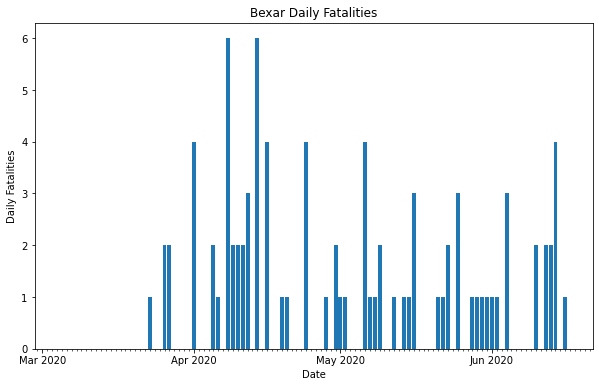

In [14]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(10,6)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Daily Fatalities',color='black')
plt.title('Bexar Daily Fatalities')
plt.bar(x.index,x['Daily Fatality Count'])
fig.savefig('BexarDailyFatalities.png')